The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [111]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np


# Start coding here!
# read .csv file
nobel = pd.read_csv('data/nobel.csv')
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [112]:
#find the most commonly awarded gender and birth country
top_gender = nobel.value_counts("sex").idxmax()
top_country = nobel.value_counts("birth_country").idxmax()
print('top_gender : {}\ntop_country : {}'.format(top_gender,top_country))

top_gender : Male
top_country : United States of America


In [113]:
#Calculate the proportion of US-born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (nobel['year'] // 10) * 10
prop_usa_winners = nobel.groupby('decade',as_index=False)['usa_born_winner'].mean()
prop_usa_winners

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


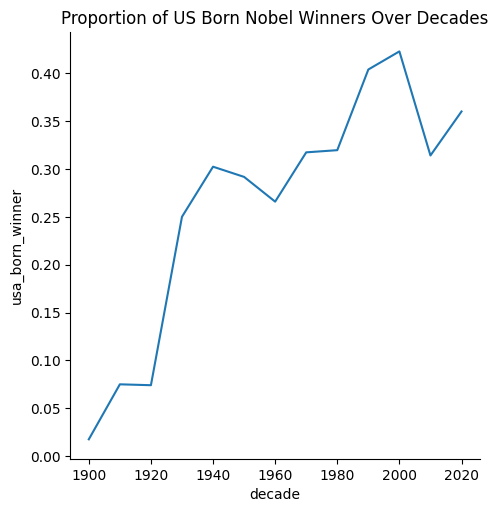

In [114]:
#Relational line plot of Proportion of US Born Nobel Winners Over Decades
ax1 = sns.relplot(x='decade',y='usa_born_winner',
                 data=prop_usa_winners,
                 kind='line')
ax1.set(title='Proportion of US Born Nobel Winners Over Decades')
ax1

In [115]:
#Calculate the proportion of female laureates per decade and category
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'],as_index=False)['female_winner'].mean()
prop_female_winners

,decade,category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
67,2020,Economics,0.111111
68,2020,Literature,0.500000
69,2020,Medicine,0.125000
70,2020,Peace,0.285714


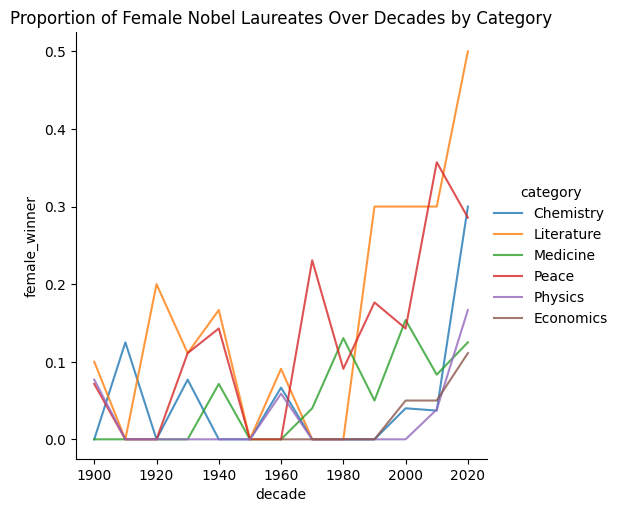

In [116]:
#Relational line plot of Proportion of Female Nobel Laureates Over Decades by Category
ax2 = sns.relplot(x='decade',y='female_winner',
                 data=prop_female_winners,
                 kind='line',
                 hue='category',alpha=0.8)

ax2.set(title='Proportion of Female Nobel Laureates Over Decades by Category')
ax2

In [117]:
#Find the first woman to receive a Nobel Prize with category
first_woman = nobel[nobel_df['female_winner']].nsmallest(1, 'year')
first_woman_name = first_woman['full_name'].values[0]
first_woman_category = first_woman['category'].values[0]
print('first_woman_name : {}\nfirst_woman_category : {}'.format(first_woman_name,first_woman_category))

first_woman_name : Marie Curie, née Sklodowska
first_woman_category : Physics


In [118]:
#Find the individuals or organizations who have won multiple Nobel Prizes
repeat_winners = nobel['full_name'].value_counts()
repeat_list = repeat_winners[repeat_winners > 1].index.tolist()
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']